In [1]:
import matplotlib.pyplot as plt
from handling import get_templates
import numpy as np

def show_object_and_mask(img_obj_RGB, img_obj_alpha):
    
    if img_obj_RGB is not None and img_obj_alpha is not None:
        plt.subplot(1, 2, 1)
        plt.imshow(img_obj_RGB)
        plt.title('RGB')
        plt.subplot(1, 2, 2)
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Mask')
        plt.show()
    
    elif img_obj_RGB is None:
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Mask')
        plt.show()

    else:
        plt.imshow(img_obj_RGB)
        plt.title('RGB')
        plt.show()

def save_iamge(img):
    plt.imsave('vis_rgb.png', img[:, :, :3])
    plt.imsave('vis_mask.png', img[:, :, 3])

In [2]:
from handling import load_canvas
from path import ROOT_DIR
import os

source_root = os.path.join(ROOT_DIR, 'data', 'source_images')
imgcan = load_canvas(os.path.join(source_root, '01_canvas'), 720, 540)

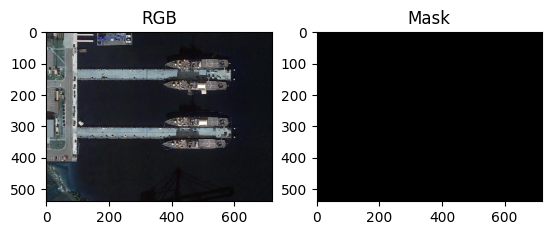

In [3]:
show_object_and_mask(imgcan[:, :, :3], imgcan[:, : , 3])

In [4]:
from augmentation import AugmentationGenerator
from config import *

auger = AugmentationGenerator(**config_paste_parameters['aug_params'])

initialized and loading cut images ...
load cut images for cableclampB ...


100%|██████████| 27/27 [00:05<00:00,  5.14it/s]


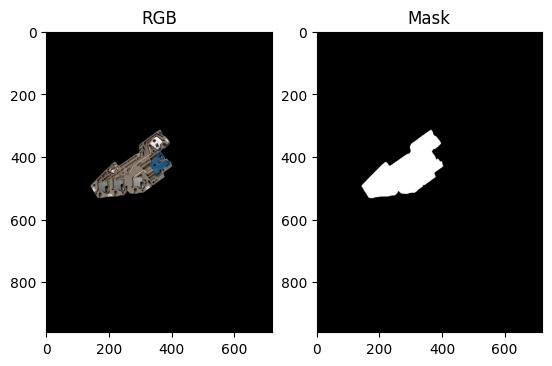

In [5]:
obj = auger.src_imgs[0][6]
show_object_and_mask(obj[:, :, :3], obj[:, : , 3])

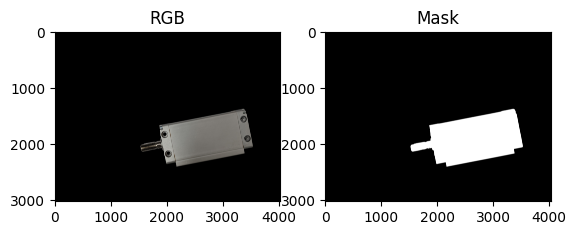

In [6]:
import cv2
original_obj = cv2.cvtColor(cv2.imread(os.path.join(ROOT_DIR, 'data', 'source_images', '04_crop', 'cylinder', 'PXL_20220905_073804227.png'), cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)/255

show_object_and_mask(original_obj[:, :, :3], original_obj[:, : , 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


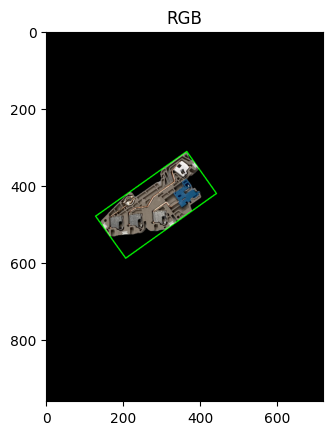

In [7]:
obj_with_box = obj.copy()

contours, _ = cv2.findContours(obj[:, :, 3].copy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(np.vstack(contours))

box = cv2.boxPoints(rect)
box = np.intp(box)
rect_image = np.zeros_like(obj_with_box[:, :, :3])
cv2.drawContours(rect_image, [box], 0, (0, 255, 0), 2)

obj_with_box[:, :, :3] = cv2.addWeighted(obj_with_box[:, :, :3], 1, rect_image, 0.5, 0)

show_object_and_mask(obj_with_box[:, :, :3], None)

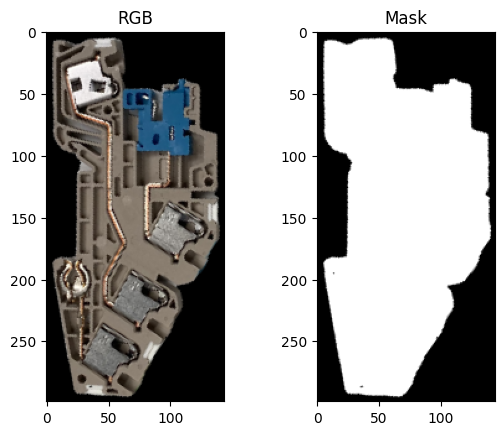

In [8]:
roi_obj = obj.copy()

contours, _ = cv2.findContours(obj[:, :, 3].copy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(np.vstack(contours))

angle = rect[2]
width = int(rect[1][0])
height = int(rect[1][1])

rotation_matrix = cv2.getRotationMatrix2D(tuple(rect[0]), angle, 1)
rotated_image = cv2.warpAffine(roi_obj, rotation_matrix, (roi_obj.shape[1], roi_obj.shape[0]))

cropped_image = rotated_image[int(rect[0][1]-height/2)-auger.correct_factor:int(rect[0][1]+height/2)+auger.correct_factor, int(rect[0][0]-width/2)-auger.correct_factor:int(rect[0][0]+width/2)+auger.correct_factor]

show_object_and_mask(cropped_image[:, :, :3], cropped_image[:, :, 3])

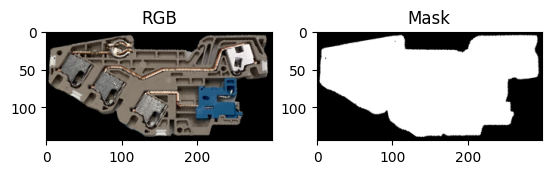

In [9]:
if cropped_image.shape[0] > cropped_image.shape[1]:
    cropped_image = cv2.transpose(cropped_image)
    cropped_image = cv2.flip(cropped_image, 1)

show_object_and_mask(cropped_image[:, :, :3], cropped_image[:, :, 3])

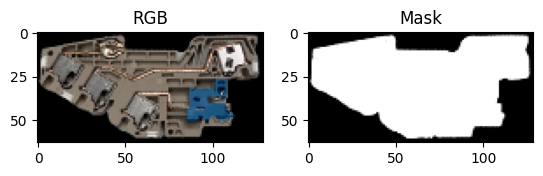

In [10]:
roi = auger.resize_object(obj, 0, 1, False)

show_object_and_mask(roi[:, :, :3], roi[:, :, 3])

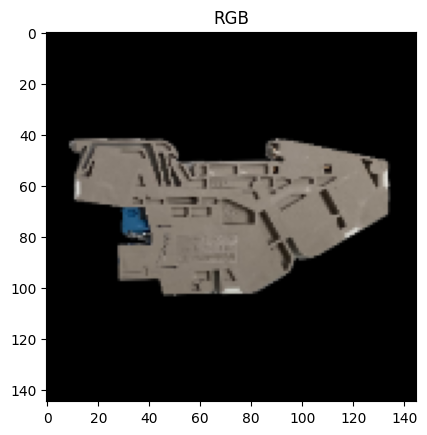

In [11]:
result = auger.img_aug(0, 1, False)

show_object_and_mask(result[:, :, :3], None)

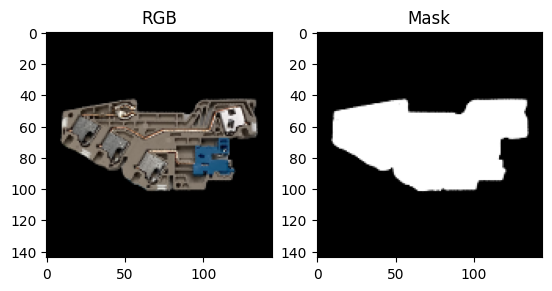

In [12]:
roi_changed = auger.pre_roi(obj, 0, 1, False)

show_object_and_mask(roi_changed[:, :, :3], roi_changed[:, :, 3])

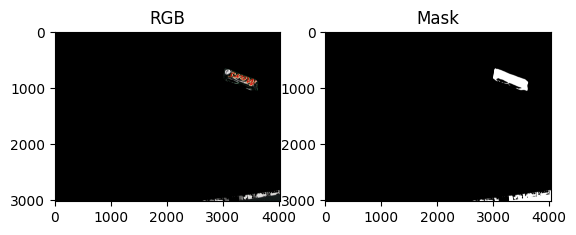

In [16]:
import cv2
import os
from handling import ROOT_DIR

error = cv2.cvtColor(cv2.imread(os.path.join(ROOT_DIR, '..', '..', 'cp-pipeline', 'data', 'source_images', '03_cut', 'mars', 'IMG_6232.png'), cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)/255

show_object_and_mask(error[:, :, :3], error[:, :, 3])